(sec:pandas10min_1)=
# 판다스 10분 완성 1부


**필수 라이브러리**

In [1]:
import numpy as np
import pandas as pd

## 시리즈와 데이터프레임

참고: [판다스 자료구조](https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro)

**시리즈 객체 생성**

리스트를 이용하여 시리즈를 생성할 수 있다.

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

**데이터프레임 객체 생성**

방식 1: 2차원 어레이, 인덱스 라벨, 열 라벨을 지정하여 데이터프레임을 생성할 수 있다.

- 인덱스 라벨: 날짜시간(`datetime`) 인덱스 이용

In [3]:
dates = pd.date_range(start="20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

- 열 라벨은 A, B, C, D로 지정

In [4]:
np.random.seed(0)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,1.764052,0.400157,0.978738,2.240893
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-03,-0.103219,0.410599,0.144044,1.454274
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-05,1.494079,-0.205158,0.313068,-0.854096
2013-01-06,-2.552990,0.653619,0.864436,-0.742165


방식 2: 사전 객체를 이용할 수도 있다.
- 사전의 키; 열 라벨
- 인덱스 라벨: 위치 인덱스 자동 지정

In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


열별로 다른 자료형이 사용될 수 있다.

In [6]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

## 데이터 살펴보기

참고: [데이터프레임 핵심 기초](https://pandas.pydata.org/docs/user_guide/basics.html#basics)

- 처음 5행 확인

In [7]:
df.head()

,A,B,C,D
2013-01-01,1.764052,0.400157,0.978738,2.240893
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-03,-0.103219,0.410599,0.144044,1.454274
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-05,1.494079,-0.205158,0.313068,-0.854096


- 끝에서 3행 확인

In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-05,1.494079,-0.205158,0.313068,-0.854096
2013-01-06,-2.552990,0.653619,0.864436,-0.742165


- 인덱스 라벨 확인

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

- 열 라벨 확인

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

- 넘파이 어레이로 변환: 인덱스 라벨과 열 라벨 정보 삭제

In [11]:
df.to_numpy()

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502]])

- 열별 자료형이 통일되지 않은 경우: `object`로 통일된 자료형 사용.

In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

- 수치형 데이터의 분포 확인

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.538420,0.067269,0.615706,0.380204
std,1.685238,0.590042,0.360293,1.239655
min,-2.552990,-0.977278,0.144044,-0.854096
25%,0.112845,-0.123450,0.345767,-0.594463
50%,1.127558,0.260916,0.654150,0.091159
75%,1.696559,0.407988,0.928675,1.174124
max,1.867558,0.653619,0.978738,2.240893


- 전치 데이터프레임

In [14]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.764052,1.867558,-0.103219,0.761038,1.494079,-2.552990
B,0.400157,-0.977278,0.410599,0.121675,-0.205158,0.653619
C,0.978738,0.950088,0.144044,0.443863,0.313068,0.864436
D,2.240893,-0.151357,1.454274,0.333674,-0.854096,-0.742165


- 열 라벨 내림차순 정렬

In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,2.240893,0.978738,0.400157,1.764052
2013-01-02,-0.151357,0.950088,-0.977278,1.867558
2013-01-03,1.454274,0.144044,0.410599,-0.103219
2013-01-04,0.333674,0.443863,0.121675,0.761038
2013-01-05,-0.854096,0.313068,-0.205158,1.494079
2013-01-06,-0.742165,0.864436,0.653619,-2.552990


- 특정 열의 값을 기준으로 행 정렬

In [16]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-05,1.494079,-0.205158,0.313068,-0.854096
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-01,1.764052,0.400157,0.978738,2.240893
2013-01-03,-0.103219,0.410599,0.144044,1.454274
2013-01-06,-2.552990,0.653619,0.864436,-0.742165


## 인덱싱/슬라이싱

참고: [Indexing and Selecting Data](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing)

### 열 인덱싱

열 라벨을 이용한 인덱싱. 시리즈 생성.

In [17]:
df["A"]

2013-01-01    1.764052
2013-01-02    1.867558
2013-01-03   -0.103219
2013-01-04    0.761038
2013-01-05    1.494079
2013-01-06   -2.552990
Freq: D, Name: A, dtype: float64

객체의 속성처럼 이용하는 방식도 가능.

In [18]:
df.A

2013-01-01    1.764052
2013-01-02    1.867558
2013-01-03   -0.103219
2013-01-04    0.761038
2013-01-05    1.494079
2013-01-06   -2.552990
Freq: D, Name: A, dtype: float64

### 행 슬라이싱

위치 인덱스 활용. 데이터프레임 생성

In [19]:
df[0:3]

,A,B,C,D
2013-01-01,1.764052,0.400157,0.978738,2.240893
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-03,-0.103219,0.410599,0.144044,1.454274


인덱스 라벨 활용. 위치 인덱스 방식과 조금 다름.

In [20]:
df["20130101":"20130103"]

,A,B,C,D
2013-01-01,1.764052,0.400157,0.978738,2.240893
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-03,-0.103219,0.410599,0.144044,1.454274


### `loc[]`: 라벨 인덱싱/슬라이싱

인덱스 라벨을 이용하면 열 라벨을 인덱스로 사용하는 시리즈가 생성된다.

In [21]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [22]:
dates[0]

Timestamp('2013-01-01 00:00:00')

In [23]:
df.loc[dates[0]]

A    1.764052
B    0.400157
C    0.978738
D    2.240893
Name: 2013-01-01 00:00:00, dtype: float64

축 활용. 행과 열에 대한 인덱싱/슬라이싱 동시에 지정.

- `A`, `B` 두 열만 추출.

In [24]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,1.764052,0.400157
2013-01-02,1.867558,-0.977278
2013-01-03,-0.103219,0.410599
2013-01-04,0.761038,0.121675
2013-01-05,1.494079,-0.205158
2013-01-06,-2.552990,0.653619


- 특정 행만 대상으로 `A`, `B` 두 열 추출

In [25]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,1.867558,-0.977278
2013-01-03,-0.103219,0.410599
2013-01-04,0.761038,0.121675


:::{admonition} 라벨 슬라이싱의 구간
:class: info

라벨을 이용한 슬라이싱은 구간의 양끝을 모두 포함한다.
:::

인덱싱이 사용되면 차원이 줄어듦.

In [26]:
df.loc["20130102", ["A", "B"]]

A    1.867558
B   -0.977278
Name: 2013-01-02 00:00:00, dtype: float64

두 개의 인덱싱은 결국 하나의 상수(스칼라) 생성.

In [27]:
df.loc[dates[0], "A"]

1.764052345967664

하나의 항목을 선택할 때 `at` 함수 사용.

In [28]:
df.at[dates[0], "A"]

1.764052345967664

### `iloc[]`: 위치 인덱싱/슬라이싱

행 선택

In [29]:
df.iloc[3]

A    0.761038
B    0.121675
C    0.443863
D    0.333674
Name: 2013-01-04 00:00:00, dtype: float64

어레이 인덱싱/슬라이싱 방식

In [30]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.761038,0.121675
2013-01-05,1.494079,-0.205158


넘파이 어레이의 팬시 인덱싱과는 다르게 작동한다.

In [31]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,1.867558,0.950088
2013-01-03,-0.103219,0.144044
2013-01-05,1.494079,0.313068


In [32]:
df.iloc[[1, 2, 4], [0, 2, 3]]

,A,C,D
2013-01-02,1.867558,0.950088,-0.151357
2013-01-03,-0.103219,0.144044,1.454274
2013-01-05,1.494079,0.313068,-0.854096


In [33]:
df.iloc[[1, 2, 4], [0, 2, 3, 1]]

,A,C,D,B
2013-01-02,1.867558,0.950088,-0.151357,-0.977278
2013-01-03,-0.103219,0.144044,1.454274,0.410599
2013-01-05,1.494079,0.313068,-0.854096,-0.205158


행 슬라이싱

In [34]:
df.iloc[1::2, :]

,A,B,C,D
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-06,-2.552990,0.653619,0.864436,-0.742165


열 슬라이싱

In [35]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.400157,0.978738
2013-01-02,-0.977278,0.950088
2013-01-03,0.410599,0.144044
2013-01-04,0.121675,0.443863
2013-01-05,-0.205158,0.313068
2013-01-06,0.653619,0.864436


하나의 항목 추출

In [36]:
df.iloc[1, 1]

-0.977277879876411

### 리인덱싱<font size='2'>reindexing</font>

기존에 정의된 시리즈와 데이터프레임으로부터 
새롭게 지정된 인덱스와 열의 라벨을 사용하는 시리즈 또는 데이터프레임을 생성할 때 사용한다.
라벨의 지정된 순서에 따라 인덱스와 열의 라벨이 새롭게 구성되며,
기존에 사용되지 않은 라벨이 추가되는 경우 해당 행 또는 열의 항목은 결측치로 처리된다.

- 시리즈 리인덱싱

In [37]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a    2.269755
b   -1.454366
c    0.045759
d   -0.187184
e    1.532779
dtype: float64

In [38]:
s.reindex(["e", "b", "f", "d"])

e    1.532779
b   -1.454366
f         NaN
d   -0.187184
dtype: float64

- 데이터프레임 리인덱싱

In [39]:
df

,A,B,C,D
2013-01-01,1.764052,0.400157,0.978738,2.240893
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-03,-0.103219,0.410599,0.144044,1.454274
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-05,1.494079,-0.205158,0.313068,-0.854096
2013-01-06,-2.552990,0.653619,0.864436,-0.742165


In [40]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [41]:
df.reindex(index=[dates[1], dates[3], dates[0]], columns=["C", "B", "A"])

,C,B,A
2013-01-02,0.950088,-0.977278,1.867558
2013-01-04,0.443863,0.121675,0.761038
2013-01-01,0.978738,0.400157,1.764052


축 기능을 이용할 수도 있다.

In [42]:
df.reindex([dates[1], dates[3], dates[0]], axis="index")

,A,B,C,D
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-01,1.764052,0.400157,0.978738,2.240893


`"index"` 대신 0을 사용할 수도 있다.
0번 축은 행을 따라 움직인다.

In [43]:
df.reindex([dates[1], dates[3], dates[0]], axis=0)

,A,B,C,D
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-01,1.764052,0.400157,0.978738,2.240893


In [44]:
df.reindex(["C", "B", "A"], axis="columns")

,C,B,A
2013-01-01,0.978738,0.400157,1.764052
2013-01-02,0.950088,-0.977278,1.867558
2013-01-03,0.144044,0.410599,-0.103219
2013-01-04,0.443863,0.121675,0.761038
2013-01-05,0.313068,-0.205158,1.494079
2013-01-06,0.864436,0.653619,-2.552990


`"columns"` 대신 1을 사용할 수도 있다.
1번 축은 열을 따라 움직인다.

In [45]:
df.reindex(["C", "B", "A"], axis=1)

,C,B,A
2013-01-01,0.978738,0.400157,1.764052
2013-01-02,0.950088,-0.977278,1.867558
2013-01-03,0.144044,0.410599,-0.103219
2013-01-04,0.443863,0.121675,0.761038
2013-01-05,0.313068,-0.205158,1.494079
2013-01-06,0.864436,0.653619,-2.552990


### 부울 인덱싱

마스크 활용

- `A` 열에 양수 항목이 있는 행만 추출

In [46]:
df["A"] > 0

2013-01-01     True
2013-01-02     True
2013-01-03    False
2013-01-04     True
2013-01-05     True
2013-01-06    False
Freq: D, Name: A, dtype: bool

In [47]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,1.764052,0.400157,0.978738,2.240893
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-05,1.494079,-0.205158,0.313068,-0.854096


아래 방식이 더 권장된다.

In [48]:
df.loc[df["A"] > 0]

,A,B,C,D
2013-01-01,1.764052,0.400157,0.978738,2.240893
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-05,1.494079,-0.205158,0.313068,-0.854096


- 양수 항목만 그대로 두고 나머지는 결측치로 처리

In [49]:
df[df > 0]

,A,B,C,D
2013-01-01,1.764052,0.400157,0.978738,2.240893
2013-01-02,1.867558,NaN,0.950088,NaN
2013-01-03,NaN,0.410599,0.144044,1.454274
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-05,1.494079,NaN,0.313068,NaN
2013-01-06,NaN,0.653619,0.864436,NaN


넘파이 어레이 방식과 다르게 작동한다.
아래 코드에서처럼 양수 항목만 모은 1차원 어레이가 생성된다.

In [50]:
aArray = df.to_numpy()
aArray

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502]])

In [51]:
aArray[aArray > 0]

array([1.76405235, 0.40015721, 0.97873798, 2.2408932 , 1.86755799,
       0.95008842, 0.4105985 , 0.14404357, 1.45427351, 0.76103773,
       0.12167502, 0.44386323, 0.33367433, 1.49407907, 0.3130677 ,
       0.6536186 , 0.8644362 ])

- [`isin()` 메서드](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin) 활용

In [52]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,1.764052,0.400157,0.978738,2.240893,one
2013-01-02,1.867558,-0.977278,0.950088,-0.151357,one
2013-01-03,-0.103219,0.410599,0.144044,1.454274,two
2013-01-04,0.761038,0.121675,0.443863,0.333674,three
2013-01-05,1.494079,-0.205158,0.313068,-0.854096,four
2013-01-06,-2.552990,0.653619,0.864436,-0.742165,three


`E` 열에 `"two"` 또는 `"four"` 가 항목으로 사용된 행만 `True`

In [53]:
df2["E"].isin(["two", "four"])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

`E` 열에 `"two"` 또는 `"four"` 가 항목으로 사용된 행만 추출하기

In [54]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-0.103219,0.410599,0.144044,1.454274,two
2013-01-05,1.494079,-0.205158,0.313068,-0.854096,four


아래 방식이 권장된다.

In [55]:
df2.loc[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-0.103219,0.410599,0.144044,1.454274,two
2013-01-05,1.494079,-0.205158,0.313068,-0.854096,four


### 항목 지정

In [56]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

`F` 열 추가. 항목은 `s1` 이용.
0번 행은 결측치로 처리됨.

In [57]:
df["F"] = s1
df

,A,B,C,D,F
2013-01-01,1.764052,0.400157,0.978738,2.240893,NaN
2013-01-02,1.867558,-0.977278,0.950088,-0.151357,1.0
2013-01-03,-0.103219,0.410599,0.144044,1.454274,2.0
2013-01-04,0.761038,0.121675,0.443863,0.333674,3.0
2013-01-05,1.494079,-0.205158,0.313068,-0.854096,4.0
2013-01-06,-2.552990,0.653619,0.864436,-0.742165,5.0


In [58]:
df.loc[dates[0], "A"] = 0

df

,A,B,C,D,F
2013-01-01,0.000000,0.400157,0.978738,2.240893,NaN
2013-01-02,1.867558,-0.977278,0.950088,-0.151357,1.0
2013-01-03,-0.103219,0.410599,0.144044,1.454274,2.0
2013-01-04,0.761038,0.121675,0.443863,0.333674,3.0
2013-01-05,1.494079,-0.205158,0.313068,-0.854096,4.0
2013-01-06,-2.552990,0.653619,0.864436,-0.742165,5.0


`iloc[]`도 활용 가능.

In [59]:
df.iloc[0, 1] = 0

In [60]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.978738,2.240893,NaN
2013-01-02,1.867558,-0.977278,0.950088,-0.151357,1.0
2013-01-03,-0.103219,0.410599,0.144044,1.454274,2.0
2013-01-04,0.761038,0.121675,0.443863,0.333674,3.0
2013-01-05,1.494079,-0.205158,0.313068,-0.854096,4.0
2013-01-06,-2.552990,0.653619,0.864436,-0.742165,5.0


어레이를 이용하여 열 또는 행을 지정할 수 있다.

- `D` 열 항목 지정

In [61]:
df.loc[:, "D"] = np.array([5] * len(df))

In [62]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN
2013-01-02,1.867558,-0.977278,0.950088,5.0,1.0
2013-01-03,-0.103219,0.410599,0.144044,5.0,2.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0
2013-01-05,1.494079,-0.205158,0.313068,5.0,4.0
2013-01-06,-2.552990,0.653619,0.864436,5.0,5.0


- 1번 행 항목 지정

In [63]:
df.loc[dates[1], :] = np.array([3] * df.shape[1])

In [64]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0
2013-01-03,-0.103219,0.410599,0.144044,5.0,2.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0
2013-01-05,1.494079,-0.205158,0.313068,5.0,4.0
2013-01-06,-2.552990,0.653619,0.864436,5.0,5.0


- `iloc[]` 도 사용 가능

In [65]:
df.iloc[2, :] = np.array([4] * df.shape[1])

In [66]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0
2013-01-05,1.494079,-0.205158,0.313068,5.0,4.0
2013-01-06,-2.552990,0.653619,0.864436,5.0,5.0


### `where()`/`mask()` 메서드 활용

참고

- [`DataFrame.where()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html)
- [`DataFrame.mask()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html)

In [67]:
s = pd.Series(range(5))
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

`where(조건식)`은 시리즈/데이터프레임의 항목 중에서 조건식이
거짓이 되도록 하는 항목 모두 결측치로 처리한 시리즈/데이터프레임을 생성한다.

In [68]:
s.where(s > 0)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [69]:
df.where(df > 0)

,A,B,C,D,F
2013-01-01,NaN,NaN,0.978738,5.0,NaN
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0
2013-01-05,1.494079,NaN,0.313068,5.0,4.0
2013-01-06,NaN,0.653619,0.864436,5.0,5.0


`mask(조건식)`은 시리즈/데이터프레임의 항목 중에서 조건식이
참이 되도록 하는 항목 모두 결측치로 처리한 시리즈/데이터프레임을 생성한다.

In [70]:
s.mask(s > 0)

0    0.0
1    NaN
2    NaN
3    NaN
4    NaN
dtype: float64

In [71]:
s.mask(s <= 0)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [72]:
df.mask(df > 0)

,A,B,C,D,F
2013-01-01,0.00000,0.000000,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN
2013-01-05,NaN,-0.205158,NaN,NaN,NaN
2013-01-06,-2.55299,NaN,NaN,NaN,NaN


In [73]:
df.mask(df <= 0)

,A,B,C,D,F
2013-01-01,NaN,NaN,0.978738,5.0,NaN
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0
2013-01-05,1.494079,NaN,0.313068,5.0,4.0
2013-01-06,NaN,0.653619,0.864436,5.0,5.0


`where()`/`mask()`의 인자로 부울 시리즈 또는 부울 데이터프레임이 사용될 수 있다.
그러면 `True`가 위치한 곳만 대상으로 마스크가 작동한다.

In [74]:
t = pd.Series([True, False, False, True])

t

0     True
1    False
2    False
3     True
dtype: bool

0번, 3번 위치만 참으로 처리된다.
4번 위치처럼 마스크에서 아예 위치로 언급되지 않는 경우는 무조건 거짓으로 처리된다.

In [75]:
s.where(t)

0    0.0
1    NaN
2    NaN
3    3.0
4    NaN
dtype: float64

`mask()` 메서드는 4번 위치처럼 마스크에서 언급되지 않은 곳은 무조건 참으로 처리한다.

In [76]:
s.mask(t)

0    NaN
1    1.0
2    2.0
3    NaN
4    NaN
dtype: float64

In [77]:
df2 = df.copy()
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0
2013-01-05,1.494079,-0.205158,0.313068,5.0,4.0
2013-01-06,-2.552990,0.653619,0.864436,5.0,5.0


연습을 위해 결측치를 제거한다.

In [78]:
df2.iloc[0, -1] = 4.
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.978738,5.0,4.0
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0
2013-01-05,1.494079,-0.205158,0.313068,5.0,4.0
2013-01-06,-2.552990,0.653619,0.864436,5.0,5.0


`where()`/`mask()`가 두 개의 인자를 사용하면
조건식이 참/거짓이 되는 항목을 결측치가 아닌 둘째 인자로 대체한다.

- 음수 항목은 해당 값의 양수로 대체

In [79]:
df3 = df2.where(df2 > 0, -df2)
df3

,A,B,C,D,F
2013-01-01,-0.000000,-0.000000,0.978738,5.0,4.0
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0
2013-01-05,1.494079,0.205158,0.313068,5.0,4.0
2013-01-06,2.552990,0.653619,0.864436,5.0,5.0


아래처럼 부울 인덱싱하는 것과 동일하다.

In [80]:
df4 = df2.copy()
df4[df2 <= 0] = -df2
df4

,A,B,C,D,F
2013-01-01,-0.000000,-0.000000,0.978738,5.0,4.0
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0
2013-01-05,1.494079,0.205158,0.313068,5.0,4.0
2013-01-06,2.552990,0.653619,0.864436,5.0,5.0


In [81]:
(df3 == df4).all(axis=None)

True

`mask()` 메서드도 유사하게 작동한다.

In [82]:
df5 = df2.mask(df2 <= 0, -df2)

In [83]:
(df3 == df5).all(None)  # axis=None

True

## 결측치

- 내부적으로 `np.nan`을 사용. 겉으로는 자료형에 따라 
    `NaN`(부동소수점), `NA`(정수), `NaT`(시간) 등으로 표기.
- 참고: [Missing Data](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data)

결측치가 포함된 어떤 연산도 결측치로 처리된다.

In [84]:
np.nan + 1

nan

심지어 두 결측치의 비교도  허영 안된다.

In [85]:
np.nan == np.nan

False

반면에 `None`은 하나의 값으로 간주되어 비교가 가능하다.

In [86]:
None == None

True

따라서 적절하게 사용하지 않으면 오류가 발생한다.

```python
>>> None + 1
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In [101], line 1
----> 1 None + 1

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'
```

### 결측치 처리

연습을 위해 결측치를 일부 포함한 데이터프레임을 생성한다.

In [87]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0
2013-01-05,1.494079,-0.205158,0.313068,5.0,4.0
2013-01-06,-2.552990,0.653619,0.864436,5.0,5.0


연습을 위해 `reindex()` 메서드를 이용하여 새로 지정된 행과 열의 라벨을 사용하는 데이터프레임을 생성한다.

In [88]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN,NaN
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0,NaN
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0,NaN
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0,NaN


결측치 일부도 특정 값으로 채운다.

In [89]:
df1.loc[dates[0] : dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN,1.0
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0,1.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0,NaN
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0,NaN


- [`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.isna.html#pandas.isna):
    결측치가 위치한 곳만 `True`로 처리하는 부울 마스크 생성

In [90]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


**결측치 삭제**: [`DataFrame.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) 메서드

- 결측치를 포함한 행을 삭제한 데이터프레임 생성

In [91]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,3.0,3.0,3.0,3.0,3.0,1.0


**결측치 대체**: [`DataFrame.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna)

- 결측치를 지정된 값으로 채운 데이터프레임 생성

In [92]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.978738,5.0,5.0,1.0
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0,1.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0,5.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0,5.0


## 연산

- 참고: [Basic section on Binary Ops](https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop).

### 통계

In [93]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0
2013-01-05,1.494079,-0.205158,0.313068,5.0,4.0
2013-01-06,-2.552990,0.653619,0.864436,5.0,5.0


`F` 열은 결측치를 제외한 5개의 값의 평균값을 구한다.

In [94]:
df.mean()

A    1.117021
B    1.261689
C    1.600018
D    4.500000
F    3.800000
dtype: float64

결측치는 모든 연산에서 무시된다.
실제로 `F` 열에서 결측치를 제외한 항목 개수는 5이다.

In [95]:
df.F.value_counts()

F
3.0    2
4.0    2
5.0    1
Name: count, dtype: int64

In [96]:
df.F.value_counts().sum()

5

결측치를 제외한 항목의 합을 5로 나눈 값은 3.8이다.

In [97]:
df.F.sum()/5

3.8

축을 지정하면 행 또는 열 기준으로 작동한다.

- 행별 평균값

In [98]:
df.mean(1) # axis=1

2013-01-01    1.494684
2013-01-02    3.000000
2013-01-03    4.000000
2013-01-04    1.865315
2013-01-05    2.120398
2013-01-06    1.793013
Freq: D, dtype: float64

### 사칙연산

In [99]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates)
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

결측치를 더 추가한다.

참고; [`DataFrame.shift()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html)

In [100]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

- 행별 뺄셈: `df - s`

In [101]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0
2013-01-05,1.494079,-0.205158,0.313068,5.0,4.0
2013-01-06,-2.552990,0.653619,0.864436,5.0,5.0


결측치가 관여하면 무조건 결측치로 처리된다.

In [102]:
df.sub(s, axis='index') # axis=0

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,3.000000,3.000000,3.000000,3.0,3.0
2013-01-04,-2.238962,-2.878325,-2.556137,2.0,0.0
2013-01-05,-3.505921,-5.205158,-4.686932,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


- 브로드캐스팅: 필요에 따라 자동 적용

In [103]:
df - 5

,A,B,C,D,F
2013-01-01,-5.000000,-5.000000,-4.021262,0.0,NaN
2013-01-02,-2.000000,-2.000000,-2.000000,-2.0,-2.0
2013-01-03,-1.000000,-1.000000,-1.000000,-1.0,-1.0
2013-01-04,-4.238962,-4.878325,-4.556137,0.0,-2.0
2013-01-05,-3.505921,-5.205158,-4.686932,0.0,-1.0
2013-01-06,-7.552990,-4.346381,-4.135564,0.0,0.0


### 함수 적용

- 참고: [`DataFrame.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply)

In [104]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0
2013-01-05,1.494079,-0.205158,0.313068,5.0,4.0
2013-01-06,-2.552990,0.653619,0.864436,5.0,5.0


- 열별 누적합

In [105]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN
2013-01-02,3.000000,3.000000,3.978738,8.0,3.0
2013-01-03,7.000000,7.000000,7.978738,12.0,7.0
2013-01-04,7.761038,7.121675,8.422601,17.0,10.0
2013-01-05,9.255117,6.916517,8.735669,22.0,14.0
2013-01-06,6.702127,7.570135,9.600105,27.0,19.0


- 행별 누적합

In [106]:
df.apply(np.cumsum, axis='columns') # axis=1

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.978738,5.978738,NaN
2013-01-02,3.000000,6.000000,9.000000,12.000000,15.000000
2013-01-03,4.000000,8.000000,12.000000,16.000000,20.000000
2013-01-04,0.761038,0.882713,1.326576,6.326576,9.326576
2013-01-05,1.494079,1.288921,1.601989,6.601989,10.601989
2013-01-06,-2.552990,-1.899371,-1.034935,3.965065,8.965065


- 열별 최대값과 최소값의 차이. 결측치는 무시

In [107]:
df.apply(lambda x: x.max() - x.min())

A    6.552990
B    4.205158
C    3.686932
D    2.000000
F    2.000000
dtype: float64

- 행별 최대값과 최소값의 차이. 결측치는 무시

In [108]:
df.apply(lambda x: x.max() - x.min(), axis=1)

2013-01-01    5.000000
2013-01-02    0.000000
2013-01-03    0.000000
2013-01-04    4.878325
2013-01-05    5.205158
2013-01-06    7.552990
Freq: D, dtype: float64

### 이산화

참고: [Histogramming and Discretization](https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization)

In [109]:
np.random.seed(17)

arr = pd.Series(np.random.randn(20))
arr

0     0.276266
1    -1.854628
2     0.623901
3     1.145311
4     1.037190
5     1.886639
6    -0.111698
7    -0.362101
8     0.148675
9    -0.437783
10    2.171257
11    1.152310
12   -1.818812
13   -0.138049
14    0.539840
15   -1.775282
16    1.314877
17   -0.473448
18   -1.092230
19   -0.250027
dtype: float64

`hist()` 메서드는 값의 범위를 10등분해서 각 구간에 속한 값들의 개수를 히스토그램으로 보여준다.

<Axes: >

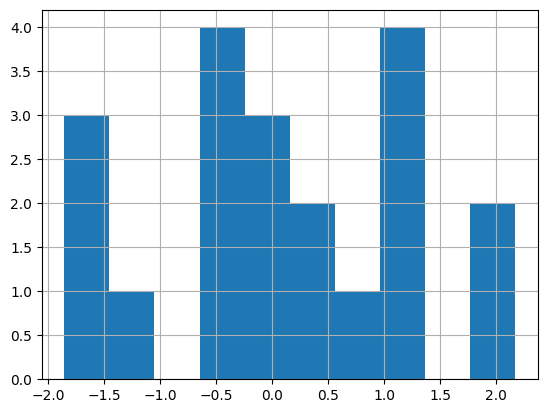

In [110]:
arr.hist() # bins=10 이 기본

전체 값의 범위를 4등분한 다음에 막대그래프를 그려보자.

In [111]:
factor = pd.cut(arr, bins=4)
factor

0       (0.158, 1.165]
1     (-1.859, -0.848]
2       (0.158, 1.165]
3       (0.158, 1.165]
4       (0.158, 1.165]
5       (1.165, 2.171]
6      (-0.848, 0.158]
7      (-0.848, 0.158]
8      (-0.848, 0.158]
9      (-0.848, 0.158]
10      (1.165, 2.171]
11      (0.158, 1.165]
12    (-1.859, -0.848]
13     (-0.848, 0.158]
14      (0.158, 1.165]
15    (-1.859, -0.848]
16      (1.165, 2.171]
17     (-0.848, 0.158]
18    (-1.859, -0.848]
19     (-0.848, 0.158]
dtype: category
Categories (4, interval[float64, right]): [(-1.859, -0.848] < (-0.848, 0.158] < (0.158, 1.165] < (1.165, 2.171]]

구간별 항목의 개수 확인

In [112]:
factor.value_counts()

(-0.848, 0.158]     7
(0.158, 1.165]      6
(-1.859, -0.848]    4
(1.165, 2.171]      3
Name: count, dtype: int64

막대그래프 그리기

<Axes: >

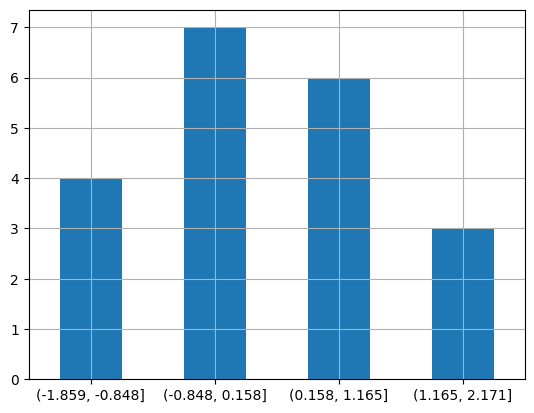

In [113]:
factor.value_counts().sort_index().plot.bar(rot=0, grid=True)

4등분한 구간에 라벨을 붙이면 정보를 보다 정확히 전달한다.

In [114]:
factor = pd.cut(arr, bins=4, labels=['A', 'B', 'C', 'D'])
factor

0     C
1     A
2     C
3     C
4     C
5     D
6     B
7     B
8     B
9     B
10    D
11    C
12    A
13    B
14    C
15    A
16    D
17    B
18    A
19    B
dtype: category
Categories (4, object): ['A' < 'B' < 'C' < 'D']

<Axes: >

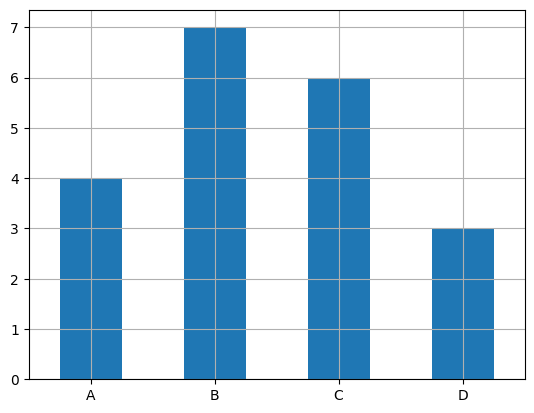

In [115]:
factor.value_counts().sort_index().plot.bar(rot=0, grid=True)

### 문자열 메서드 활용

참고

- [정규식](https://docs.python.org/3/library/re.html)
- [벡터와 문자열 메서드](https://pandas.pydata.org/docs/user_guide/text.html#text-string-methods)

`str` 속성은 모든 항목을 문자열로 변환한 벡터를 가리킨다.

In [116]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str

변환된 벡터에 문자열 메서드를 적용하면 새로운 시리즈가 생성된다.

In [117]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [118]:
df = pd.DataFrame(np.random.randn(3, 2), columns=[" Column A ", " Column B "], index=range(3))
df

,Column A,Column B
0,-0.982294,1.031269
1,0.491334,-0.446647
2,-0.806360,0.131268


열 라벨에 대해 문자열 메서드를 적용해보자.

- 소문자화

In [119]:
df.columns.str.lower()

Index([' column a ', ' column b '], dtype='object')

- 양끝의 공백 제거

In [120]:
df.columns.str.lower().str.strip()

Index(['column a', 'column b'], dtype='object')

- 중간에 위치한 공백을 밑줄(underscore)로 대체

In [121]:
df.columns.str.strip().str.lower().str.replace(" ", "_")

Index(['column_a', 'column_b'], dtype='object')

열 라벨을 소문자로는 변경하지 않으면서 모든 공백을 제거해보자.

In [122]:
columns1 = df.columns.str.strip().str.replace(" ", "_")
columns1

Index(['Column_A', 'Column_B'], dtype='object')

In [123]:
df.columns=columns1
df

,Column_A,Column_B
0,-0.982294,1.031269
1,0.491334,-0.446647
2,-0.806360,0.131268
